In [5]:
import numpy as np
max_dist_from_goal = 100
x = np.arange(-100, 150, 1)
y = np.clip(1 - (np.log(x/ max_dist_from_goal) / np.log(
            5 / max_dist_from_goal)), -1, 1)

/tmp/ipykernel_392197/2511889577.py:4: RuntimeWarning: divide by zero encountered in log
  y = np.clip(1 - (np.log(x/ max_dist_from_goal) / np.log(
/tmp/ipykernel_392197/2511889577.py:4: RuntimeWarning: invalid value encountered in log
  y = np.clip(1 - (np.log(x/ max_dist_from_goal) / np.log(


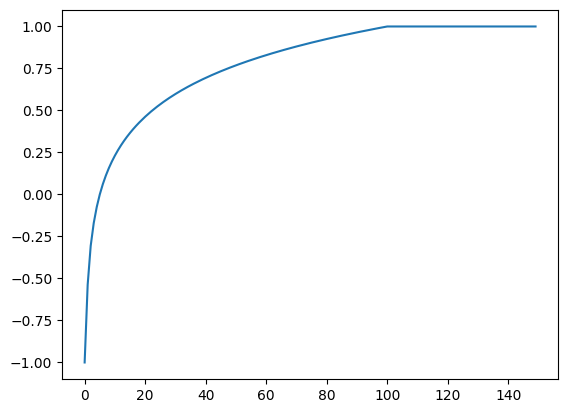

In [6]:
import matplotlib.pyplot as plt
plt.plot(x, y)
plt.show()